In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
import time
from PIL import Image
import os

In [2]:
resnet50model = load_model('models/resnet50_adabtiveLR.h5')

In [3]:
image_name = '400.jpg'
image_path = os.path.join('Kaggle dataset/cepha400/',image_name)
input_image = np.asarray(Image.open(image_path))
test_dataset = pd.read_csv('Kaggle dataset/test2_senior.csv')



In [4]:
def find_image_labels(image_name,df):
    image_label = df.loc[df['image_path'] == image_name].values[0][1:]
    print(image_label)
    return image_label


true_labels = find_image_labels(image_name,test_dataset)

[750 1041 1313 942 1232 1174 572 1265 1331 1488 1297 1871 1304 1957 1264
 2011 1290 1993 655 1829 1388 1671 1416 1696 1486 1574 1472 1802 1459 1482
 1399 1915 928 1451 1379 1442 608 1358]


In [5]:
def resnet_preprocess_image(image):
    gray_image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE ) 
    gray_resized_image = cv2.resize(gray_image,(193,240))
    rgb_resized_image = cv2.cvtColor(gray_resized_image,cv2.COLOR_GRAY2RGB)
    final_rgb_image = np.reshape(rgb_resized_image, (1,rgb_resized_image.shape[0],rgb_resized_image.shape[1],rgb_resized_image.shape[2]))
    print(final_rgb_image.shape)
    return final_rgb_image


model_image = resnet_preprocess_image(input_image)

(1, 240, 193, 3)


1/1 [==============================] - 1s 1s/step
[[ 75.36862   96.514206 128.75737   87.29191  118.81993  111.51383
   56.711807 113.61378  132.0228   138.14551  129.8555   167.56874
  129.30313  180.15063  124.03612  186.10378  127.26971  184.14204
   71.17579  160.8683   134.3199   153.06982  137.3821   153.95715
  147.43102  146.30661  145.56978  163.38126  141.07951  135.13646
  136.11983  185.91183   91.97048  131.95091  132.42717  130.64136
   63.611046 123.356834]]


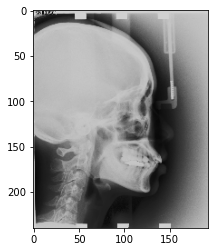

In [6]:
predicted_labels = resnet50model.predict(model_image)
print(predicted_labels)
output_image =np.copy(model_image)
for i in range(0,(len(true_labels)-1),2):
        output_image = cv2.circle(output_image,(int(predicted_labels[0][i]),int(predicted_labels[0][i+1])), 2, (255,0,0),-1)
        output_image = cv2.circle(output_image,(int(true_labels[i]),int(true_labels[i+1])), 2, (0,255,0),-1)

data = Image.fromarray(output_image[0])
data.save('output_image_resnet.jpg')
plt.imshow(output_image[0])